# 🧠 SeaNet Ontology on Google Colab
Load, manipulate, and query the SeaNet RDF knowledge graph without installing Neo4j or needing admin rights.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ✅ Install required packages
!pip install rdflib

In [4]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/toco/seanet_colab/")

In [5]:
# ✅ Import libraries
from rdflib import Graph, Namespace
from generator.generate_kb import *
from api.seanet_api import *
from pathlib import Path

In [6]:
# ✅ Generate RDF Knowledge Graph
generate_kb = Path('/content/drive/MyDrive/Colab Notebooks/toco/seanet_colab/generator/generate_kb.py')
exec(generate_kb.read_text())
g = Graph().parse("seanet.rdf", format="turtle")
print("RDF Triples:", len(g))

RDF Triples: 2


In [14]:
# ✅ Connect all hosts & block one
connect_all_hosts(g)
#block_hosts(g, ["host1"])
print("After operations:", len(g))

After operations: 1


In [15]:
# ✅ Run SPARQL query
sparql_query = Path("/content/drive/MyDrive/Colab Notebooks/toco/seanet_colab/sparql/queries.rq").read_text()
for row in g.query(sparql_query):
    print(row)

In [16]:
# ✅ Run SPARQL query
sparql_query_ad =  Path("/content/drive/MyDrive/Colab Notebooks/toco/seanet_colab/sparql/queries1.rq").read_text()
for row in g.query(sparql_query_ad):
    print(row)

In [9]:
from export_rdf_graph import export_rdf_as_png


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

def export_rdf_as_png(rdf_graph: Graph, output_path="seanet_rdf_graph.png"):
    G = nx.DiGraph()
    for s, p, o in rdf_graph:
        G.add_edge(str(s), str(o), label=str(p))

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=8, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    plt.axis("off")
    #plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    print(f"✅ Graph saved as {output_path}")

✅ Graph saved as seanet_rdf_graph.png


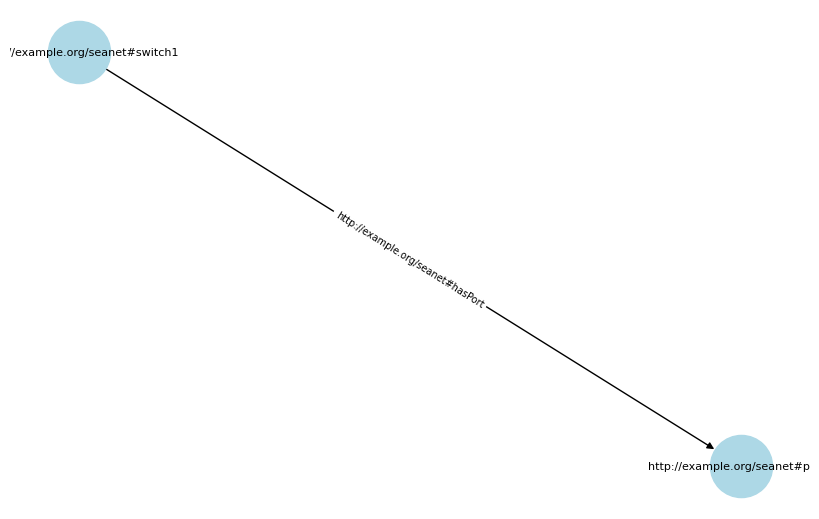

In [18]:
export_rdf_as_png(g, "seanet_rdf_graph.png")
